# OCR auf Bozner Zeitung: Trainieren des Algorithmus, Output

Laden der zunächst erforderlichen Libraries:

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import os

## 1. Der Trainingsdatensatz

Angabe des Pfades, der zu den Trainingsdaten führt. Bei mir wohnen die Trainingsdaten auf meiner lokalen Festplatte, im Unterordner **Training_Data_Reshape_200x200**.

In [2]:
data_path = '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200/'

Ich schaue mir an, wie die Trainingsdaten in Unterordnern organisiert sind. Hierzu verwende ich die Library **glob**. Nähres zu dieser Library findet man unter: https://docs.python.org/2/library/glob.html.

In [3]:
samples = np.sort(glob.glob(data_path+'*'))
print(samples)

['/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\0'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\1'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\2'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\3'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\4'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\5'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\6'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Training_Data_Reshape_200x200\\7'
 '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-

Wie man sieht, sind die Trainingsdaten in 10 Unterordnern gespeichert (0-9), auf die ich im nächsten Schritt zugreife.

In diesem Schritt werden die Trainingsdaten aus den Unterordern entnommen und in eine Liste eingefügt, die **all_data** heisst.
Mit der Zahl in **num_samples** lege ich fest, wie viele Bilder pro Unterorder entnommen werden sollen. 
  
Mit **num_samples = 20** entnehme ich aus jedem Unterordner 20 Bilder.  
Mit **replace=False** stelle ich sicher, dass dies stets verschiedene Bilder sind (d.h. nicht 2x das gleiche Bild).  
Mit **np.random.choice()** lege ich fest, dass die 20 Bilder jeweils zufällig ausgewählt werden sollen.  

In [4]:
num_samples = 20

all_data = []
for ind, s in enumerate(samples[0:10]):
    files = glob.glob(s+'/*.png')
    
    data = [skimage.transform.rescale(skimage.io.imread(files[x], as_gray=True), 1, anti_aliasing=False, multichannel=False, mode='reflect') 
                 for x in np.random.choice(np.arange(len(files)),num_samples,replace=False)]
    
    all_data.append(data)

Die Liste **all_data** enthält nun die aufgerufenen Daten (d.h. in diesem Fall: Pixelwerte, weil wir es mit Bildern zu tun haben) als Elemente, die mit Kommata getrennt sind.
Mit **np.concatenate()** und **np.reshape()** werden diese Daten in die für die Library **scikit-learn** erforderliche Form gebracht. Diese Library brauchen wir weiter unten fürs Machine Learning.

In [5]:
data = np.concatenate(all_data,axis = 0)

In [6]:
data.shape

(200, 200, 200)

In [7]:
d2_data = np.reshape(data, (num_samples*10, 40000))

## 2. Erzeugen der Trainingskategorien

Den Trainingsdaten werden nun die erforderlichen Kategorien zugeordnet. Dabei werden beispielsweise alle zuvor in die Liste **all_data** eingespielten Daten aus dem **Unterordner 0** der Kategorie **0** zugordnet.

In [8]:
cats = [str(i) for i in range(len(all_data))]
category = np.concatenate([[cats[i] for j in range(num_samples)] for i in range(len(cats))])

Die Variable **Category** enthält diese Kategorieinformationen. Gibt man sie aus, sieht man sehr schön, dass jeder Kategorie von **0 bis 9** jeweils 20 Datenwerte zugeordnet sind. Das entspricht genau der in Zelle 4 mit **num_samples** definierten Datenmenge pro Kategorie.

In [9]:
category

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9

## 3. Trainieren des Machine Learning Algorithmus

Wir haben nun zwei Entitäten generiert:
- eine Liste mit Pixel-Werten (unsere Trainingsdaten)
- eine Liste mit zugehörigen Kategorien   

Diese beiden Entitäten verwenden wir, um einen ML-Algorithmus zu trainieren.

Hierzu laden wir zunächst die für das Trainineren der ML-Algorithmus erforderlichen Libraries.  
Für unsere Anwendung verwenden wir einen Random-Forest-Classifier als ML-Algorithmus.

Vgl. hierzu: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Wie wir das im Workshop mit Matthias Müller gelernt haben, splitten wir die Trainingsdaten in einen Trainingsset und einen Testset. Dies tun wir, um die Performanz unseres Klassifikators zu testen.

Da wir nichts Näheres spezifizieren, werden 3/4 unserer Daten als Trainingsdaten verwendet und 1/4 als Testdaten. Vgl. hierzu auch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.  
  

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(d2_data, category, random_state=0)

Nun trainieren wir den Klassifikator und erstellen ein Vorhersagemodell, mit dem wir bei neuen Bildern vorhersagen können, zu welcher Kategorie sie voraussichtlich gehören.  
  
Bei unserem Klassifikator können verschiedene Parameter eingestellt werden. In diesem Fall verwenden wir bei **n_estimators** den Wert 1000. Die Parameter, die man variieren kann, sind aber schier unbegrenzt: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. 

In [12]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Wir wenden nun den trainierten Algorithmus auf unsere Testdaten an.

In [13]:
ypred = model.predict(Xtest)

In [14]:
ypred

array(['0', '8', '5', '4', '8', '9', '0', '7', '0', '7', '3', '6', '9',
       '7', '4', '0', '1', '6', '1', '3', '9', '7', '2', '7', '3', '6',
       '8', '9', '6', '2', '0', '2', '7', '5', '1', '9', '6', '0', '4',
       '5', '6', '3', '1', '5', '8', '3', '0', '3', '5', '7'], dtype='<U1')

Wir können einen ersten Eindruck von der Vorhersagequalität unseres Algorithmus bekommen, indem wir anhand einiger Testdaten überprüfen, was der Algorithmus für Vorhersagen macht.

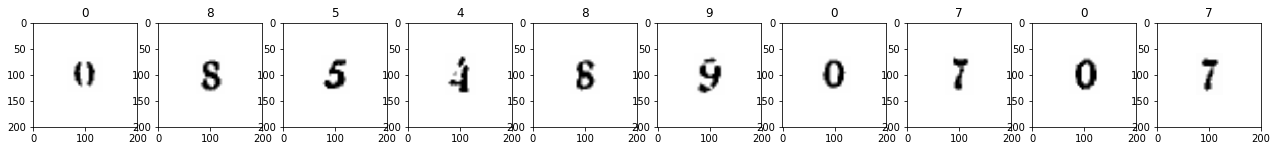

In [15]:
fig, ax = plt.subplots(1, 10, figsize = (22,10))
for x in range(10):
    ax[x].imshow(np.reshape(Xtest[x],(200,200)),cmap='gray')
    ax[x].set_title(ypred[x])
plt.show()

Das sieht gut aus. Wir können uns eine Statistik für die Vorhersagequalität bezüglich aller Testdaten ausgeben lassen:

In [16]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Aus der Statistik kann man einiges ablesen:
- die Grösse des Testdatensatzes beträgt 50 Bilder (1/4 von 20 Bilder x 10 Kategorien, d.h. 1/4 x 200 = 50)
- die Anzahl der für jede Kategorie getesteten Bilder ist unter **support** angegeben
- der f1-score gibt die Vorhersagegenauigkeit an. (Vgl. https://en.wikipedia.org/wiki/F1_score)  
  1.0 wäre demzufolge eine Vorhersagegenauigkeit von 100%.

## 4. Verwenden des trainierten Algorithmus auf neue Daten

Unser Algorithmus ist auf das Erkennen einstelliger Zahlen trainiert, weswegen wir ihm auch einstellige Zahlen geben müssen, um sinnvolle Vorhersagen zu bekommen.

Ich habe mir einen Ordner mit einigen Bildern von einstelligen Zahlen zurechtgelegt. Er heisst **Prediction_Data_Segmented_Reshaped**. In diesem Ordner sind Bilder von Zahlen abgelegt, die auf die gleiche Weise wie die Trainingsdaten vorprozessiert sind. 

Aus diesem Ordner entnehme ich irgendein Bild und spiele das ganze Vorhersageprozedere durch.

In [17]:
pred_image = skimage.io.imread('/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Prediction_Data_Segmented_Reshaped/3.png', as_gray=True)

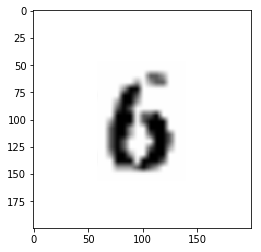

In [18]:
plt.imshow(pred_image, cmap = 'gray')
plt.show()

Wie bei den Trainingsdaten auch, muss ich dieses Bild in das für **scikit-learn** erforderliche Format bringen:

In [19]:
pred_image_new = np.reshape(pred_image, (1, 40000))

Jetzt kann ich die Vorhersage durchführen lassen:

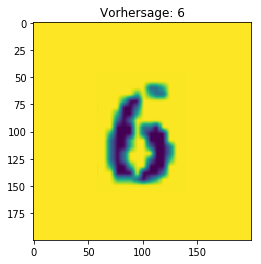

In [20]:
ypred = model.predict(pred_image_new)
fig,ax = plt.subplots()
plt.imshow(pred_image)
ax.set_title('Vorhersage: '+ ypred[0])
plt.show()

## 5. Vorhersage für alle Bilder im Ordner

Nachdem das für ein Bild klappt, möchte ich das für beliebig viele Bilder implementieren. Hierzu muss ich nur den Code, den ich habe, in ein Loop einbauen.

Zunächst definiere ich wieder den Pfad, wo Python meine Vorhersagedaten findet:

In [21]:
path_input = '/Users/Michael/Anaconda3/Jupiter_Notebooks/DigitalScholarship-UB-Bern/Bozner_OCR/Prediction_Data_Segmented_Reshaped/'

Dann baue ich ein Loop, bei dem ich Python sage, er soll sämtliche Files in meinem Input-Pfad der oben für ein Bild durchexerzierten Prozedur unterziehen.

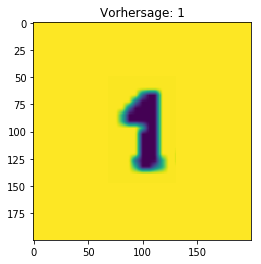

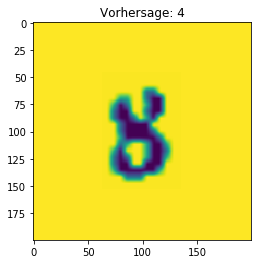

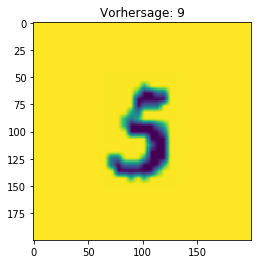

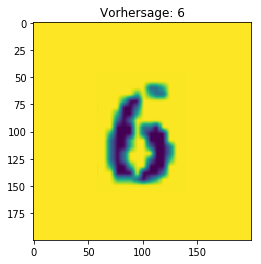

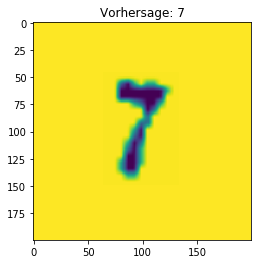

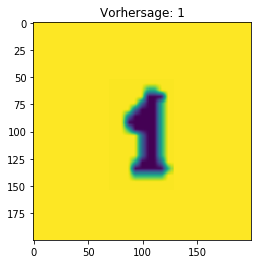

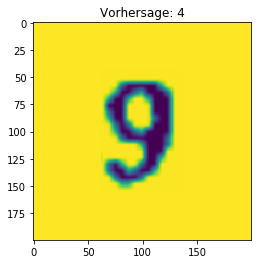

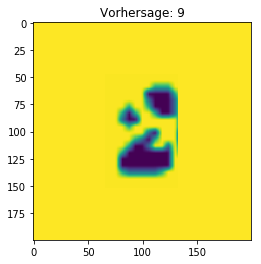

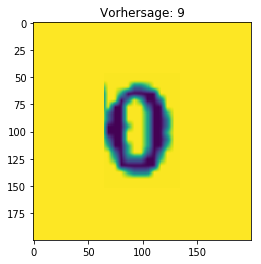

In [22]:
for subdir, dirs, files in os.walk(path_input):
    
    for file in files:
        
        bild = skimage.io.imread(path_input + str(file), as_gray=True)

        bild_new = np.reshape(bild, (1, 40000))

        ypred = model.predict(bild_new)
        fig,ax = plt.subplots()
        plt.imshow(bild)
        ax.set_title('Vorhersage: '+ ypred[0])
        plt.show()    

## 6. Verbesserung der Vorhersagequalität

Wie man sieht ist die Vorhersagequalität recht schlecht.  
Interessant ist, was passiert, wenn man den gesamten Code nochmal laufen lässt und dabei lediglich die Anzahl an Trainingsbildern verändert:
von 20 pro Kategorie auf 500 pro Kategorie. Da wir momentan aber über wesentlich weniger Trainingsdaten verfügen, können wir das nur über einen Trick erreichen: wir lassen Python aus jedem Ordner 1000 Bilder aussuchen, was nur möglich ist, wenn er wiederholt das gleiche Bild aussuchen darf. Dies erreichen wir durch die Vorgabe **replace=True** in Zelle 4.  

Also, das Ganze nochmal neu:

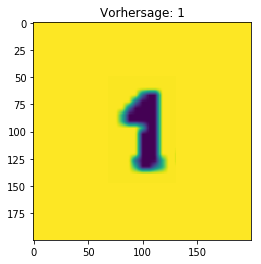

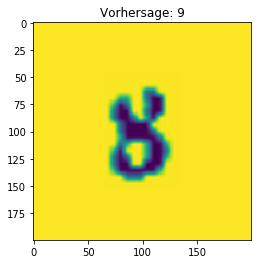

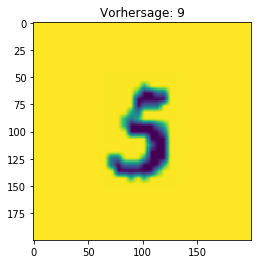

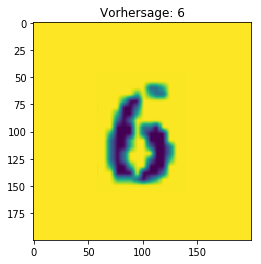

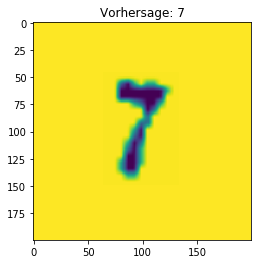

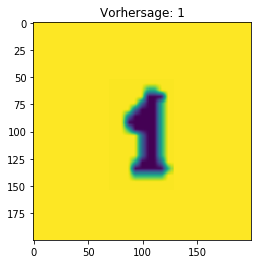

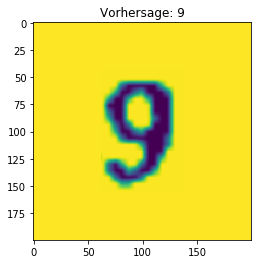

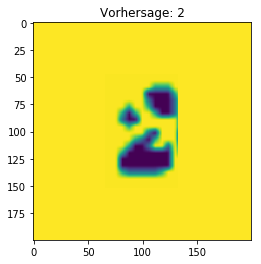

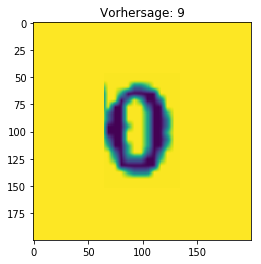

In [23]:
num_samples = 500

all_data = []
for ind, s in enumerate(samples[0:10]):
    files = glob.glob(s+'/*.png')
    
    data = [skimage.transform.rescale(skimage.io.imread(files[x], as_gray=True), 1, anti_aliasing=False, multichannel=False, mode='reflect') 
                 for x in np.random.choice(np.arange(len(files)),num_samples,replace=True)]
    
    all_data.append(data)

data = np.concatenate(all_data,axis = 0)

d2_data = np.reshape(data, (num_samples*10, 40000))

cats = [str(i) for i in range(len(all_data))]
category = np.concatenate([[cats[i] for j in range(num_samples)] for i in range(len(cats))])

Xtrain, Xtest, ytrain, ytest = train_test_split(d2_data, category, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)

for subdir, dirs, files in os.walk(path_input):
    
    for file in files:
        
        bild = skimage.io.imread(path_input + str(file), as_gray=True)

        bild_new = np.reshape(bild, (1, 40000))

        ypred = model.predict(bild_new)
        fig,ax = plt.subplots()
        plt.imshow(bild)
        ax.set_title('Vorhersage: '+ ypred[0])
        plt.show() 

Bessere Vorhersagen bekommt man dort, wo im Trainingsdatenordner mehr verschiedene Bilder vorhanden sind, also etwa bei der **1 (76 Bilder)**, der **2 (75 Bilder)**, der **7 (64 Bilder)**. Schlechtere Vorhersagen bekommt man dort, wo weniger verschiedene Bilder vorhanden sind, etwa bei der **0 (30 Bilder)** oder der **5 (27 Bilder)**. 

Man wird vermutlich eine recht gute Vorhersagequalität erreichen, wenn man den Trainingsdatensatz noch etwas vergrössert.